# Task
Collect, Explore, Pre-process and Transform Healthcare Data based on specific disease database given in session storage "heart.csv", perform EDA on the same dataset and also build a model for predicting heart disease and show predictions and visualise the results and metrics.

## Load data

### Subtask:
Load the healthcare dataset from the provided CSV file.


**Reasoning**:
Import pandas and load the dataframe.



In [1]:
import pandas as pd

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Explore data

### Subtask:
Perform initial exploration of the dataset to understand its structure, content, and basic statistics.


**Reasoning**:
Perform initial exploration of the dataset by displaying its shape, data types, concise summary, and descriptive statistics as requested in the instructions.



In [2]:
print("Shape of the DataFrame:", df.shape)
print("\nData types of each column:\n", df.dtypes)
print("\nConcise summary of the DataFrame:")
df.info()
print("\nDescriptive statistics of numerical columns:")
display(df.describe())

Shape of the DataFrame: (303, 14)

Data types of each column:
 age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

Concise summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int6

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Pre-process data

### Subtask:
Clean and preprocess the data by handling missing values, outliers, and transforming features as needed.


**Reasoning**:
Reconfirm and handle missing values, identify and handle outliers in numerical columns using IQR, and consider feature scaling for numerical features.



In [3]:
# 1. Check for and handle missing values
print("Missing values before handling:")
print(df.isnull().sum())

# As confirmed before, there are no missing values. If there were, common strategies include:
# df.dropna(inplace=True) # Removing rows with missing values
# df.fillna(df.mean(), inplace=True) # Imputing missing values with the mean

# 2. Identify and handle outliers in relevant numerical columns using IQR
# We'll consider numerical columns for outlier detection.
numerical_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'caa']

print("\nChecking for outliers using IQR:")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in '{col}': {len(outliers)} rows")

    # Handling outliers: Removing them for simplicity in this case
    # Another approach could be capping (transforming outliers to the bounds)
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Display the shape after outlier removal
print(f"\nShape of DataFrame after outlier removal: {df.shape}")

# 3. Feature transformation: Scaling numerical features
# We will use StandardScaler to scale the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nDataFrame after scaling numerical features:")
display(df.head())

Missing values before handling:
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Checking for outliers using IQR:
Outliers in 'age': 0 rows
Outliers in 'trtbps': 9 rows
Outliers in 'chol': 5 rows
Outliers in 'thalachh': 1 rows
Outliers in 'oldpeak': 4 rows
Outliers in 'caa': 21 rows

Shape of DataFrame after outlier removal: (263, 14)

DataFrame after scaling numerical features:


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,1.026498,1,3,1.011170,-0.198453,1,0,-0.038791,0,1.303150,0,-0.703911,1,1
1,-1.864438,1,2,0.034655,0.185818,0,1,1.602408,0,2.463304,0,-0.703911,2,1
2,-1.419678,0,1,0.034655,-0.853973,0,0,0.937057,0,0.433036,2,-0.703911,2,1
3,0.248169,1,1,-0.616356,-0.130640,0,1,1.203197,0,-0.147041,2,-0.703911,2,1
4,0.359359,0,0,-0.616356,2.536651,0,1,0.537846,1,-0.340400,2,-0.703911,2,1


## Perform eda

### Subtask:
Conduct exploratory data analysis to gain insights into the data distribution, relationships between variables, and potential patterns related to heart disease.


**Reasoning**:
Create histograms for numerical columns to visualize their distributions, generate box plots for numerical columns grouped by 'output', create count plots for categorical columns, generate a correlation heatmap for numerical variables, and create scatter plots for pairs of numerical variables colored by 'output'.



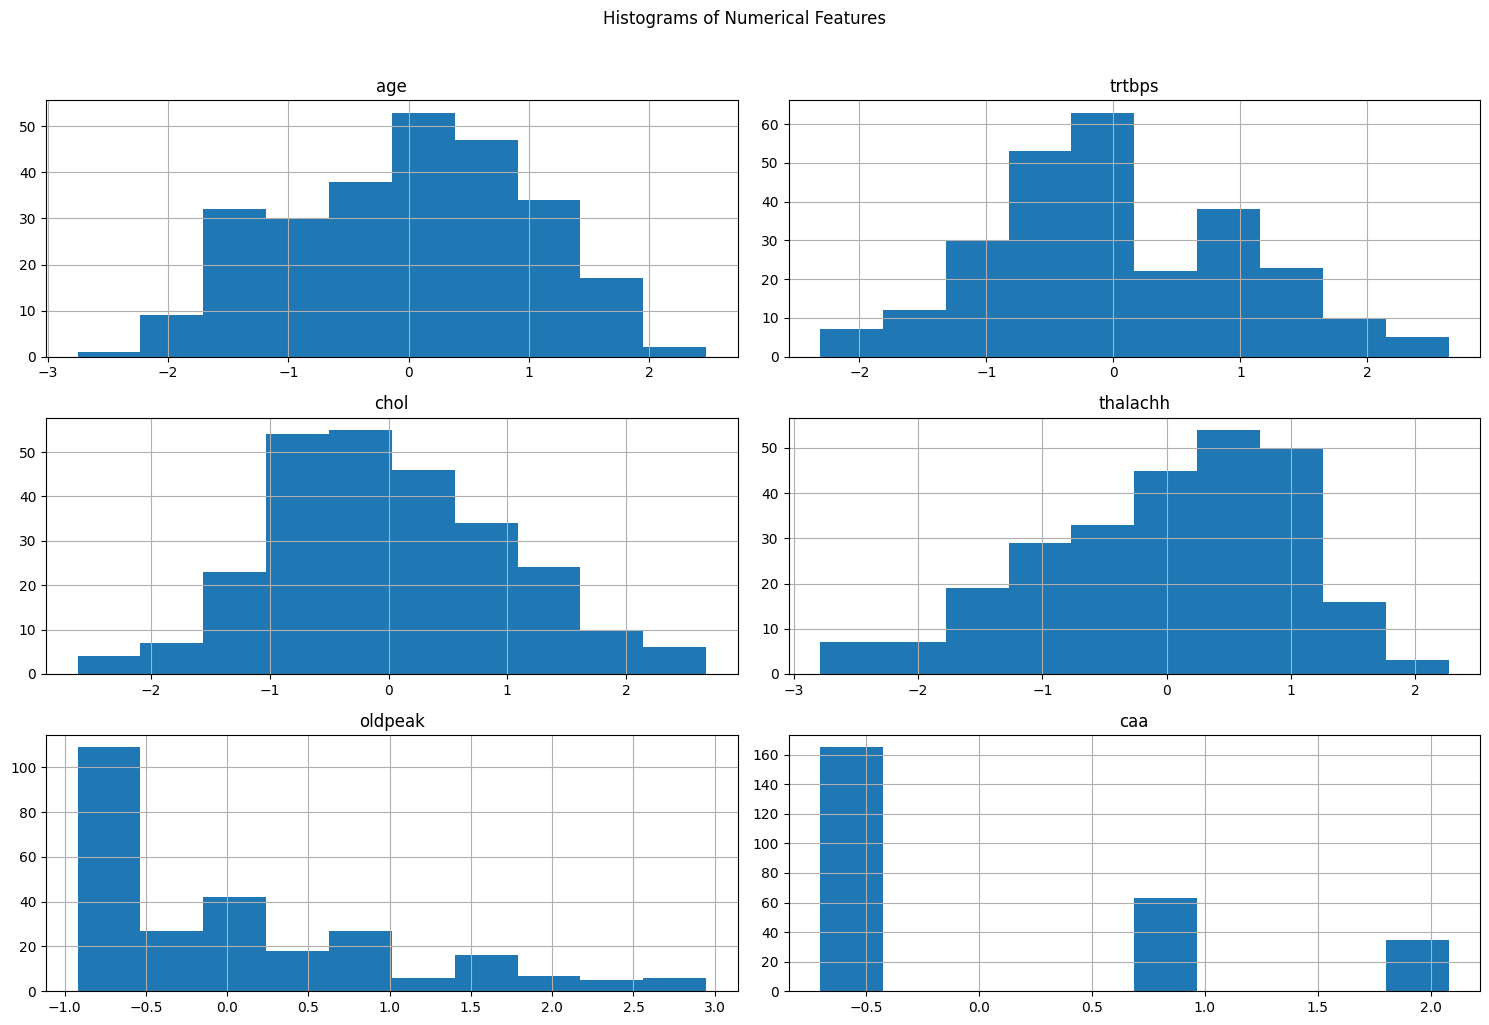

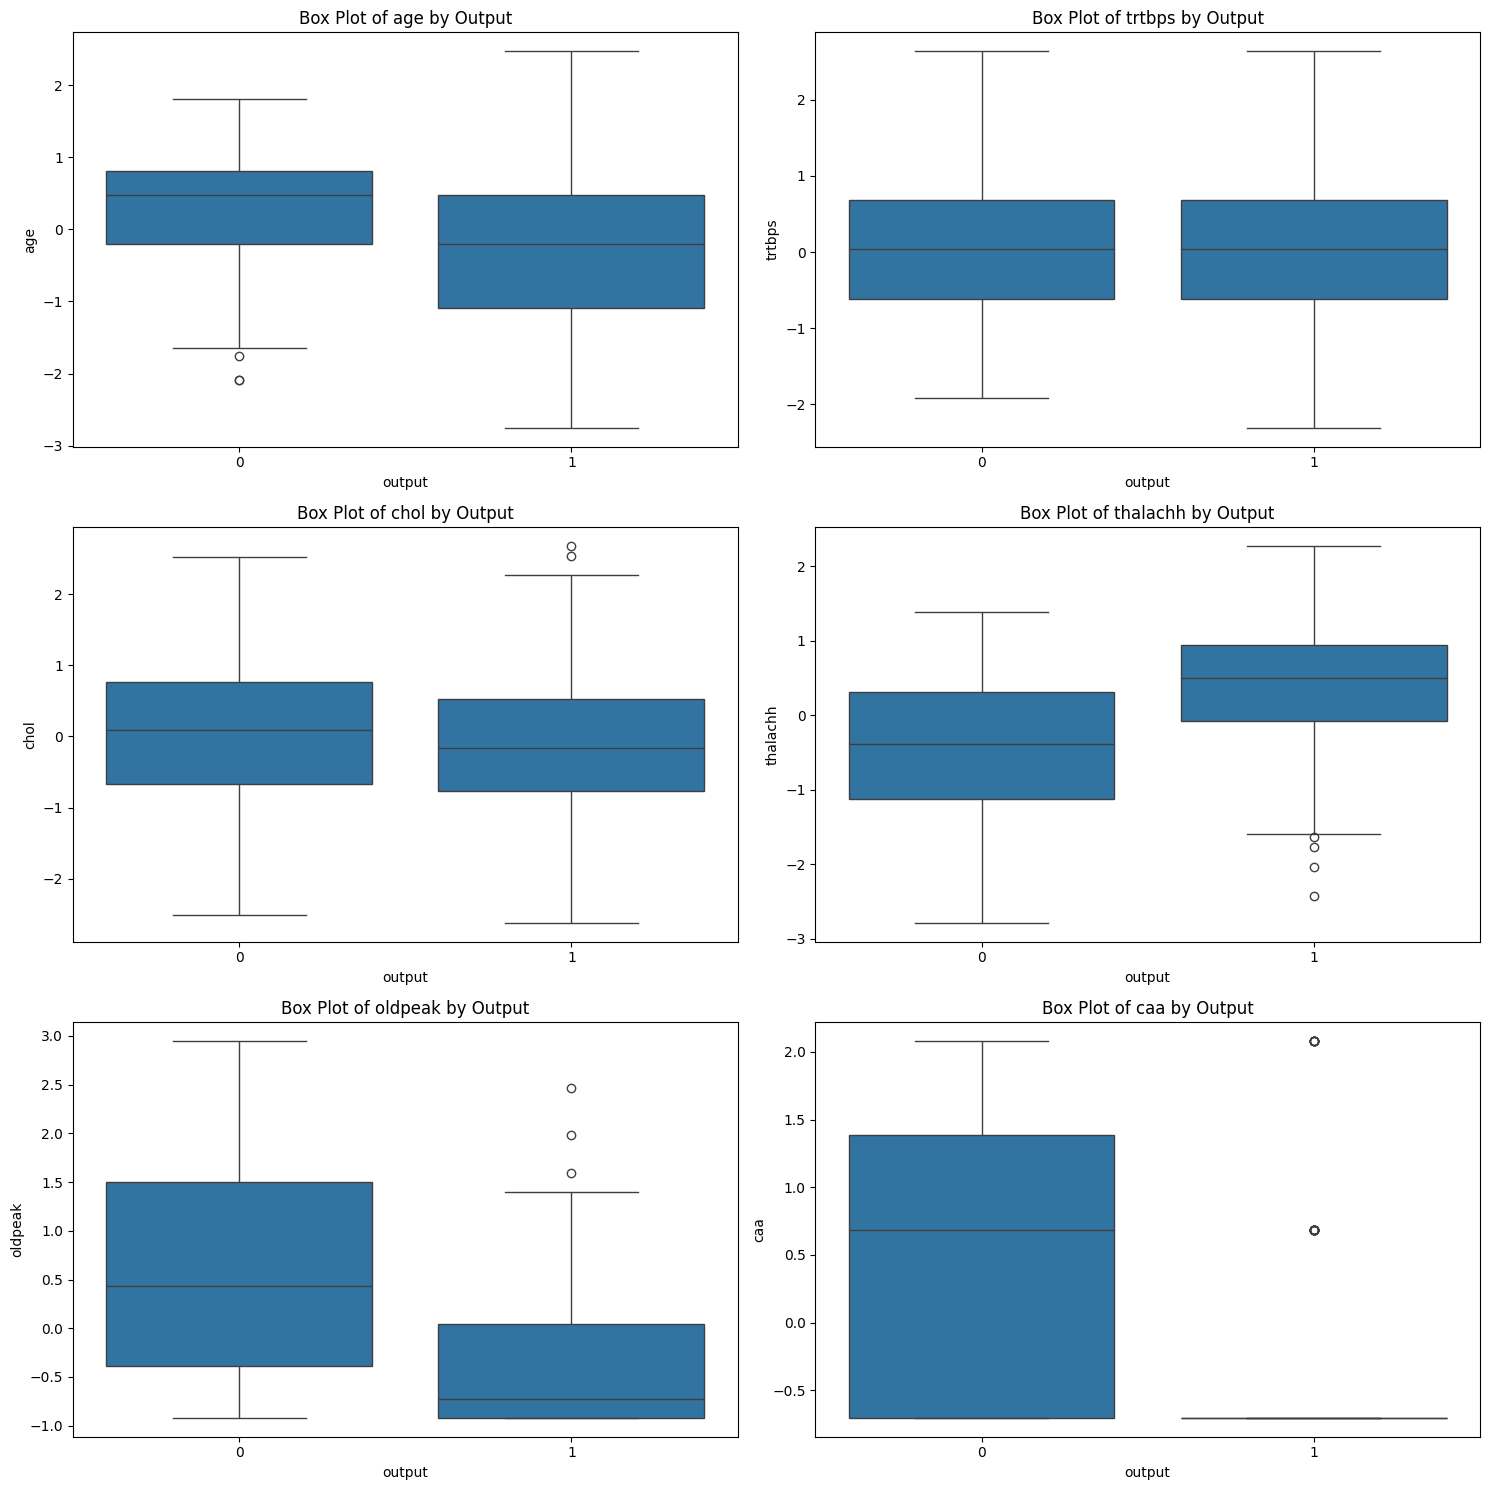

ValueError: Could not interpret value `exang` for `x`. An entry with this name does not appear in `data`.

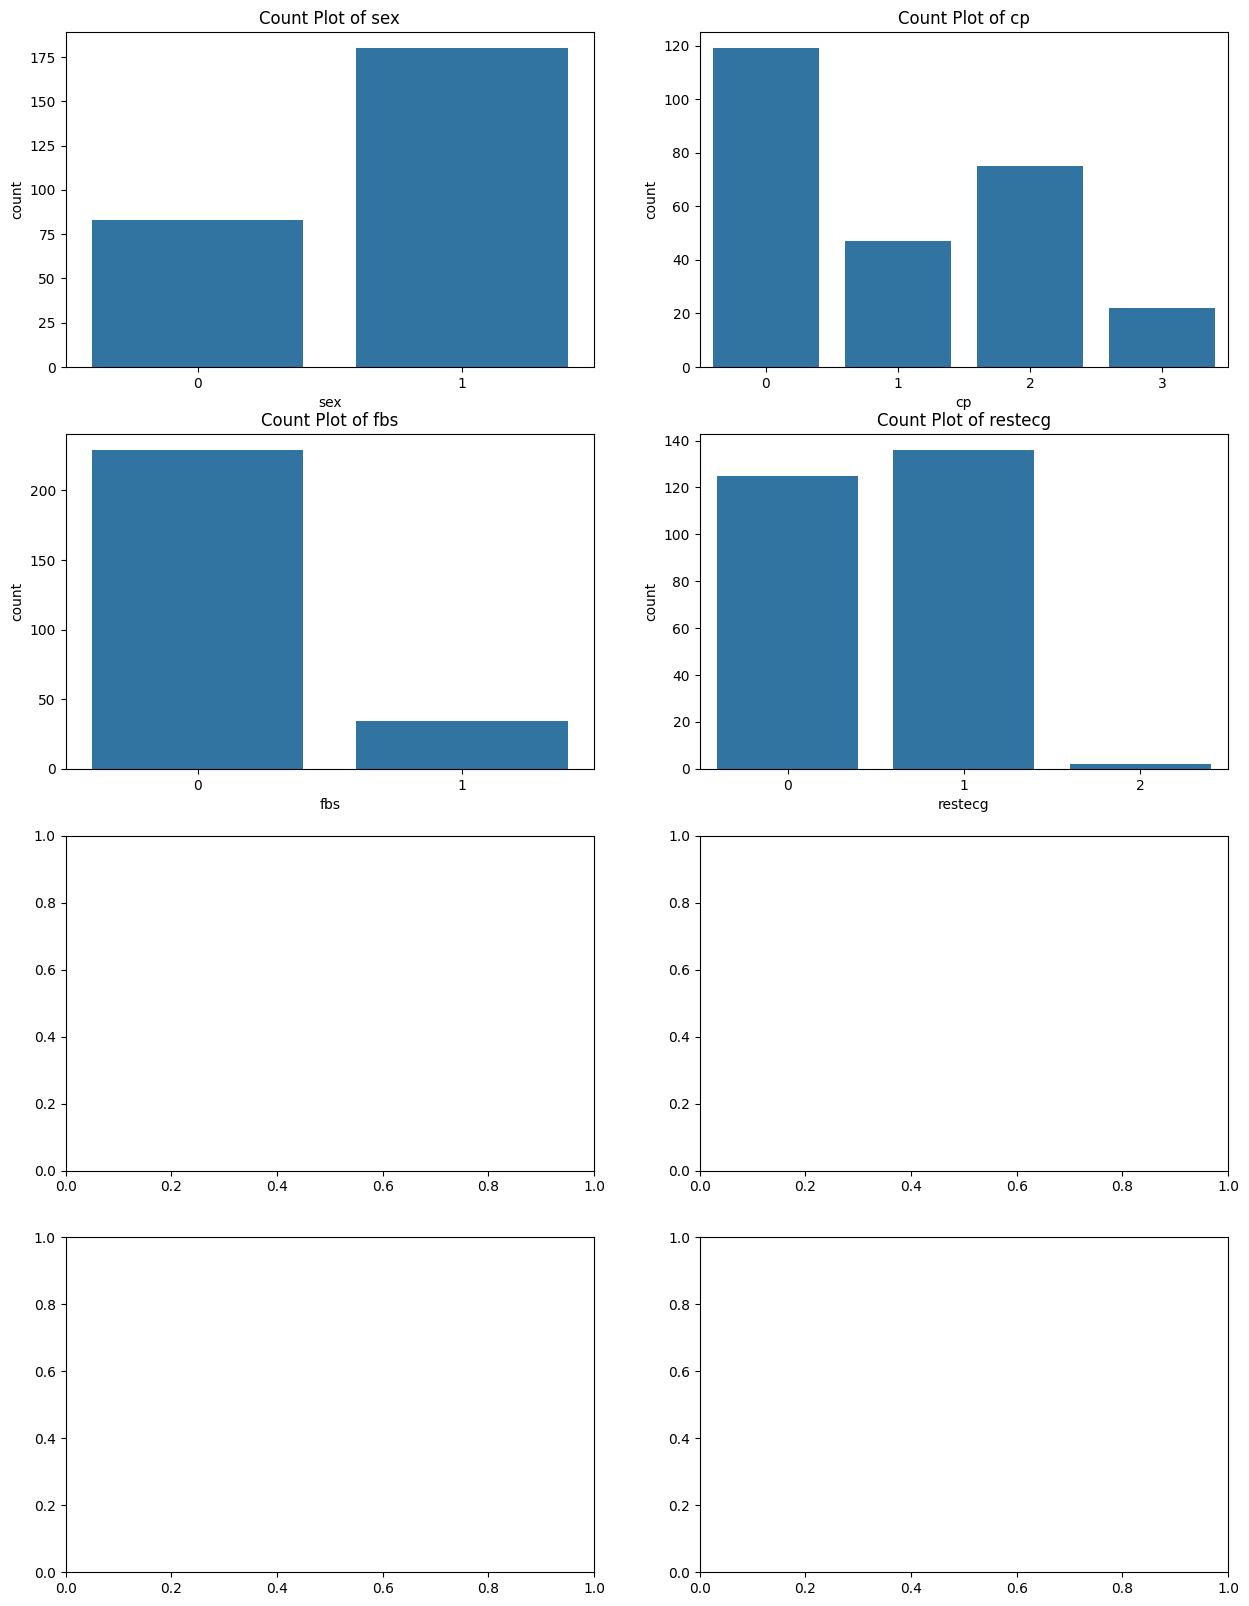

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histograms for numerical columns
numerical_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'caa']
df[numerical_cols].hist(figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

# 2. Box plots for numerical columns, grouped by 'output'
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x='output', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col} by Output')
plt.tight_layout()
plt.show()

# 3. Count plots for categorical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slp', 'thall']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')
if len(categorical_cols) < len(axes):
    for j in range(len(categorical_cols), len(axes)):
        fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

# 4. Correlation heatmap for numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# 5. Scatter plots for pairs of numerical variables, colored by 'output'
sns.pairplot(df[numerical_cols + ['output']], hue='output', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features by Output', y=1.02)
plt.show()

**Reasoning**:
The previous command failed because the column 'exang' was not found in the DataFrame. This likely happened during the outlier removal step where rows with outliers were dropped, potentially removing all instances of certain categories in some columns. The categorical columns should be re-identified from the current state of the dataframe.



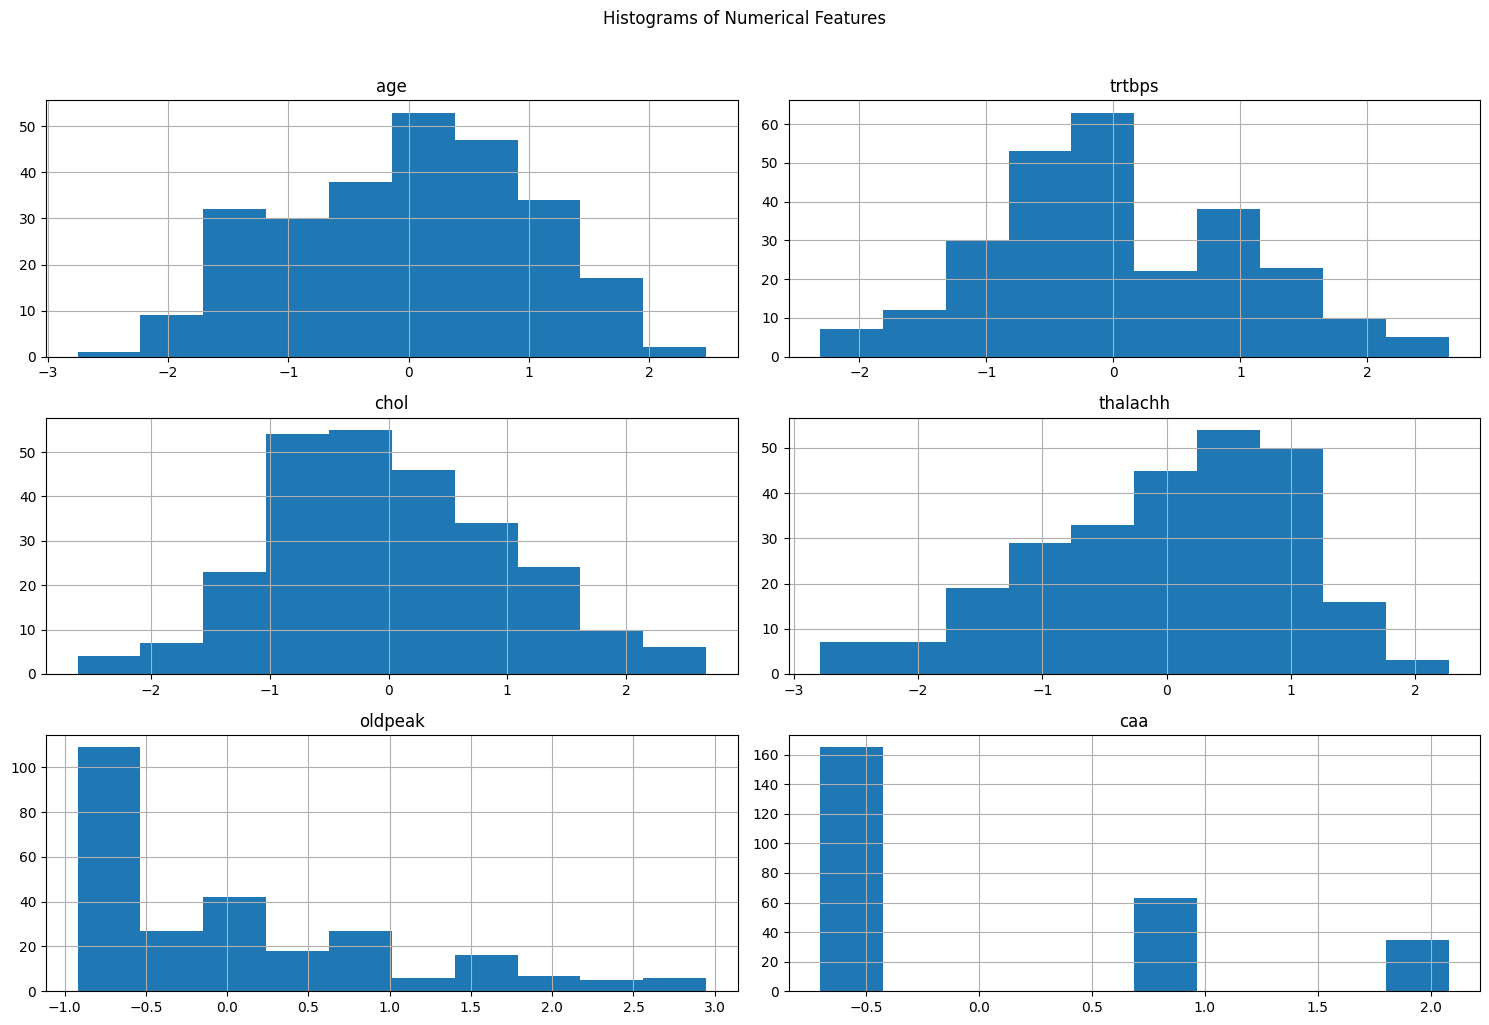

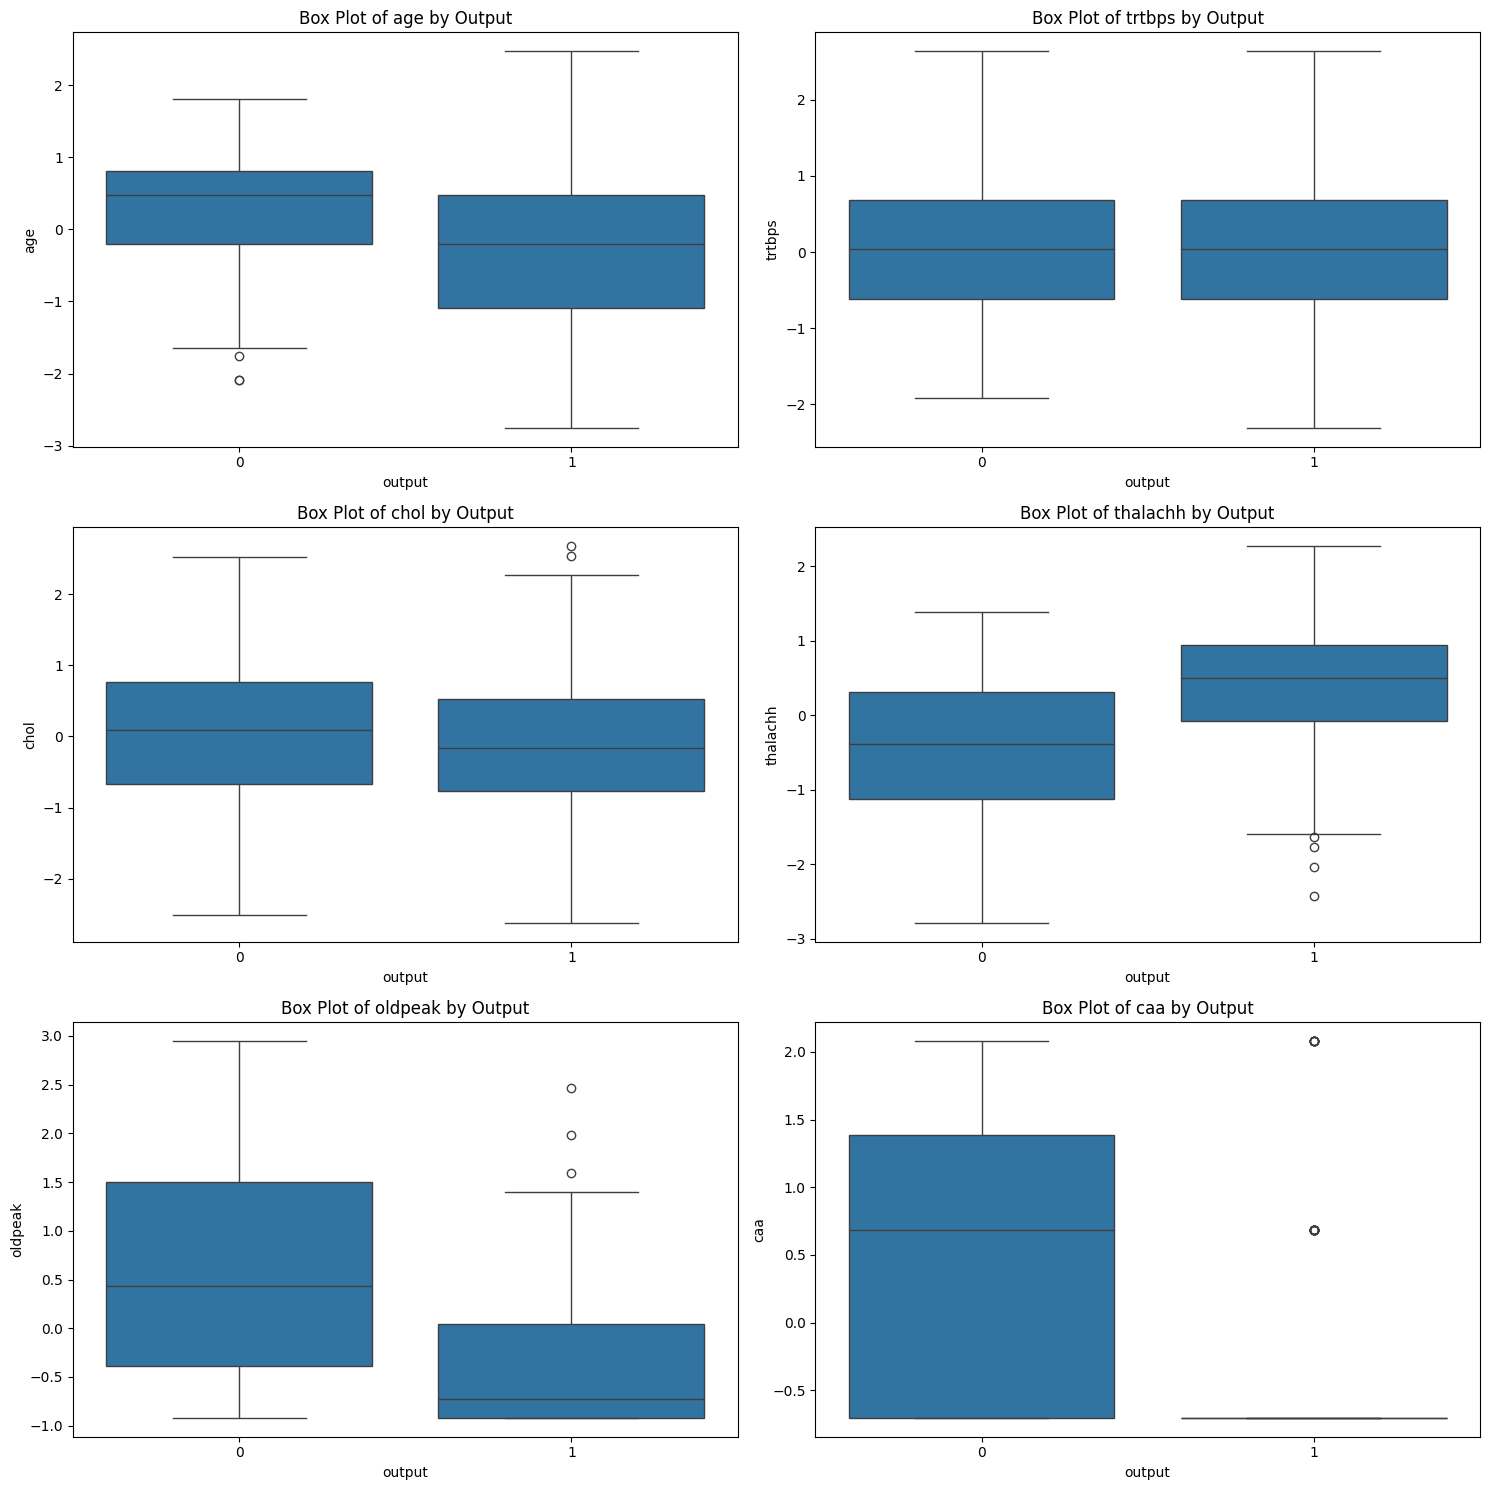

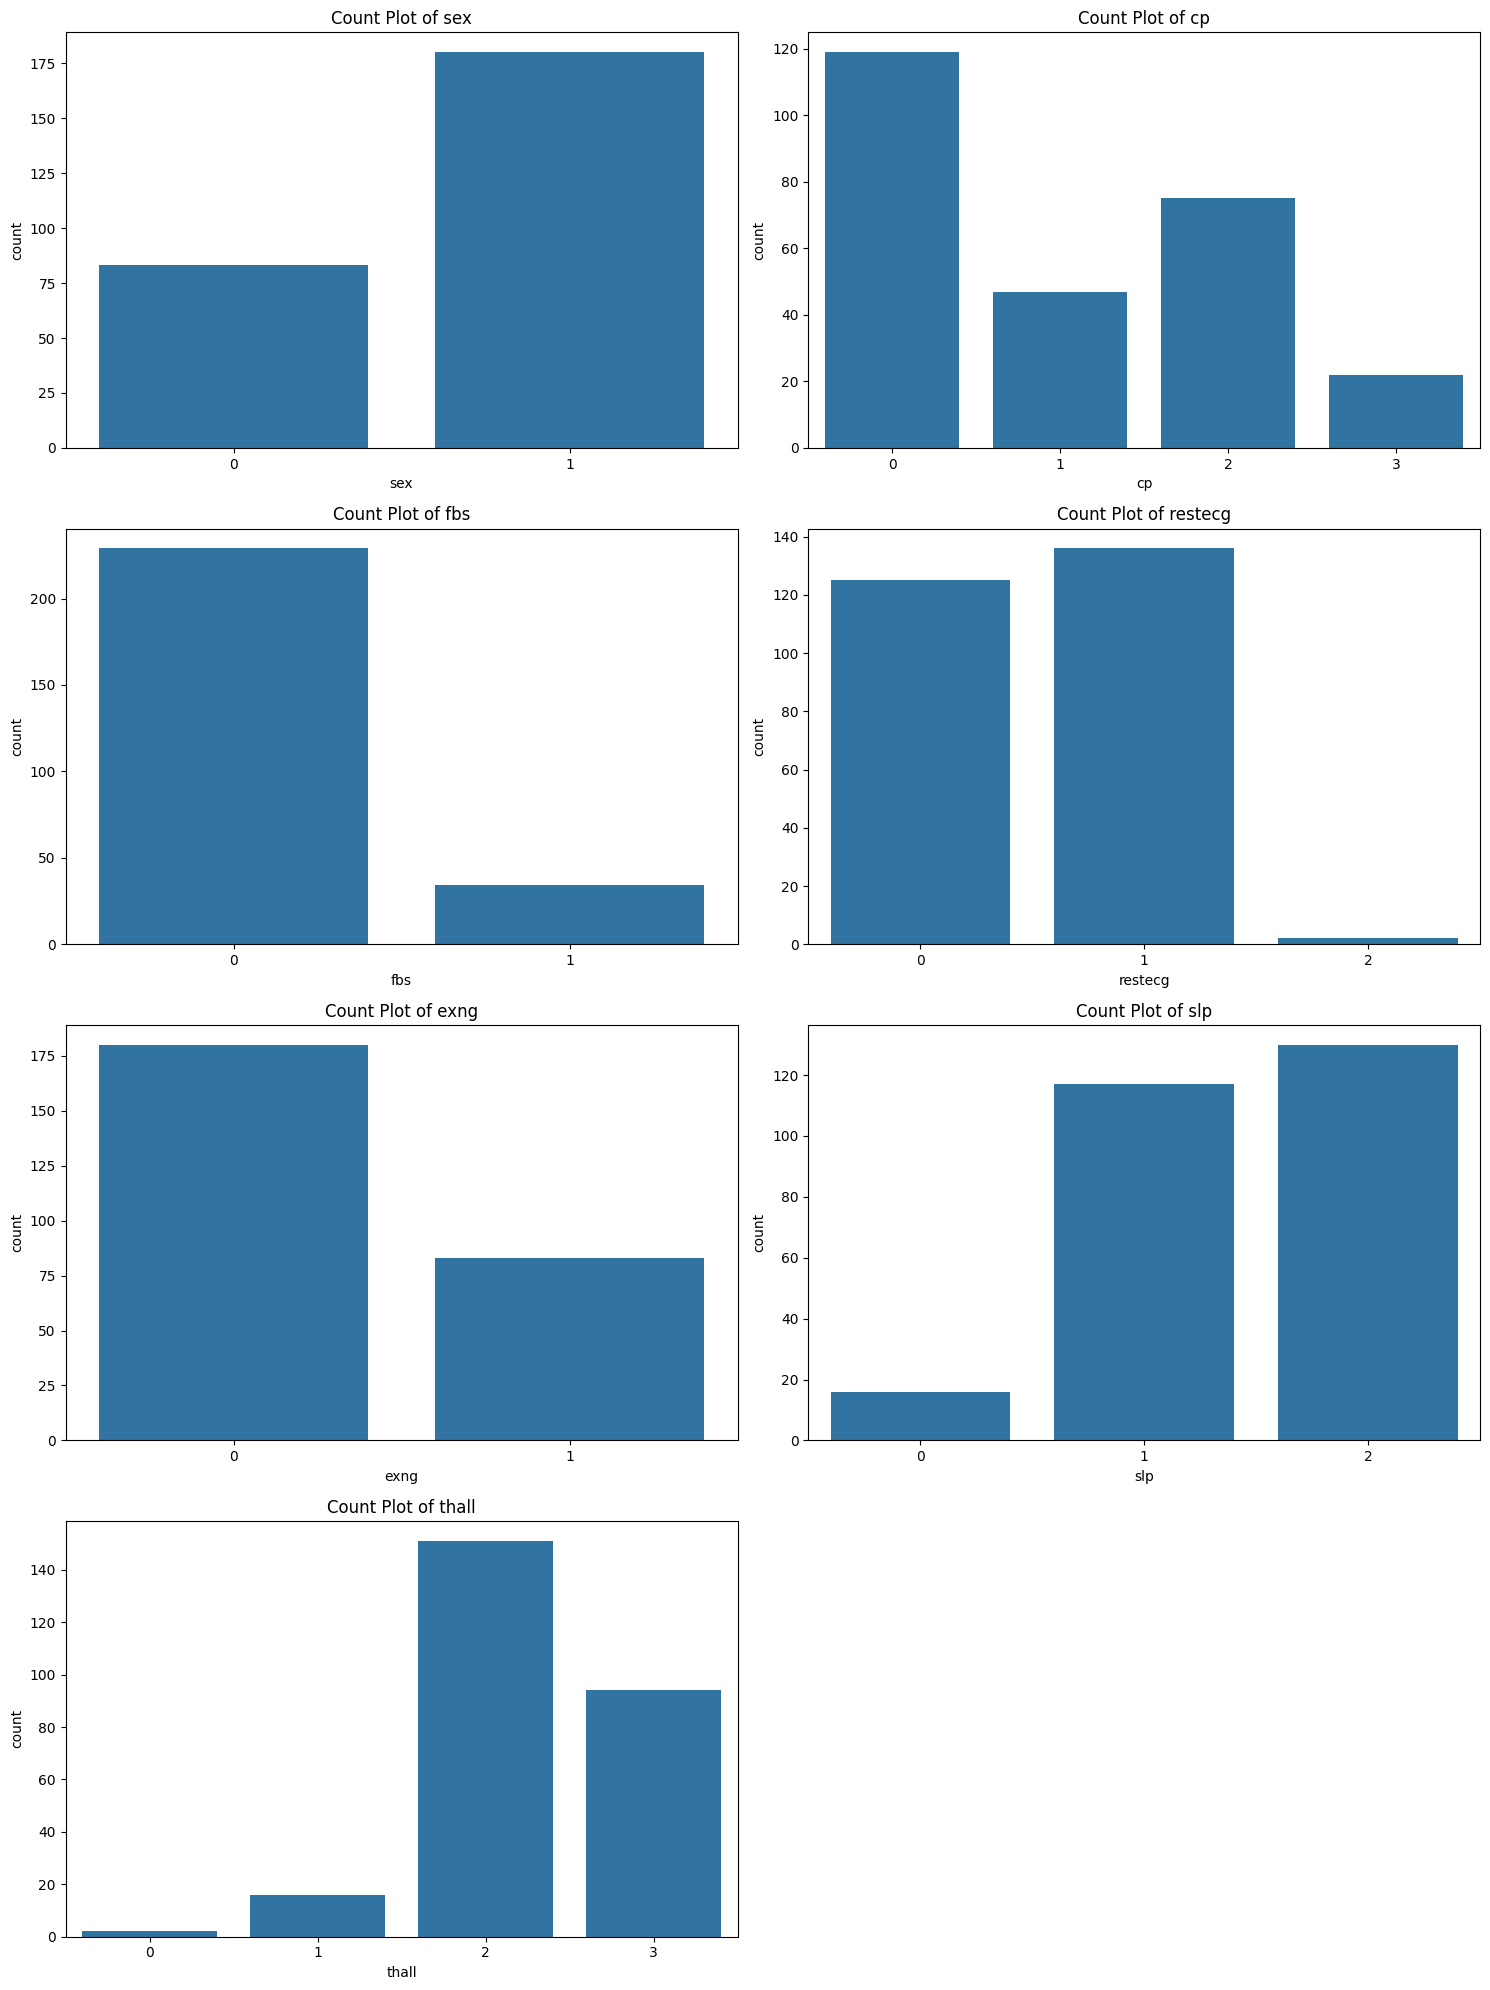

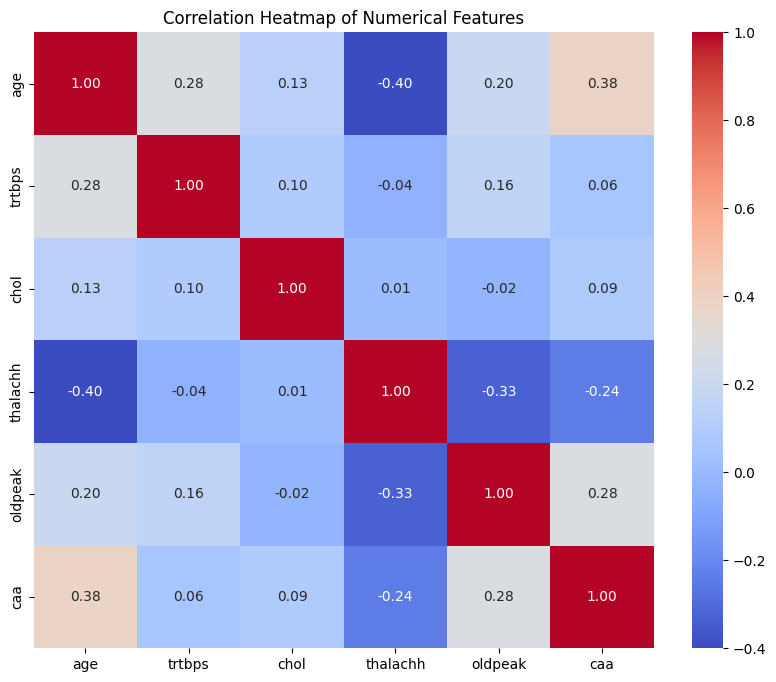

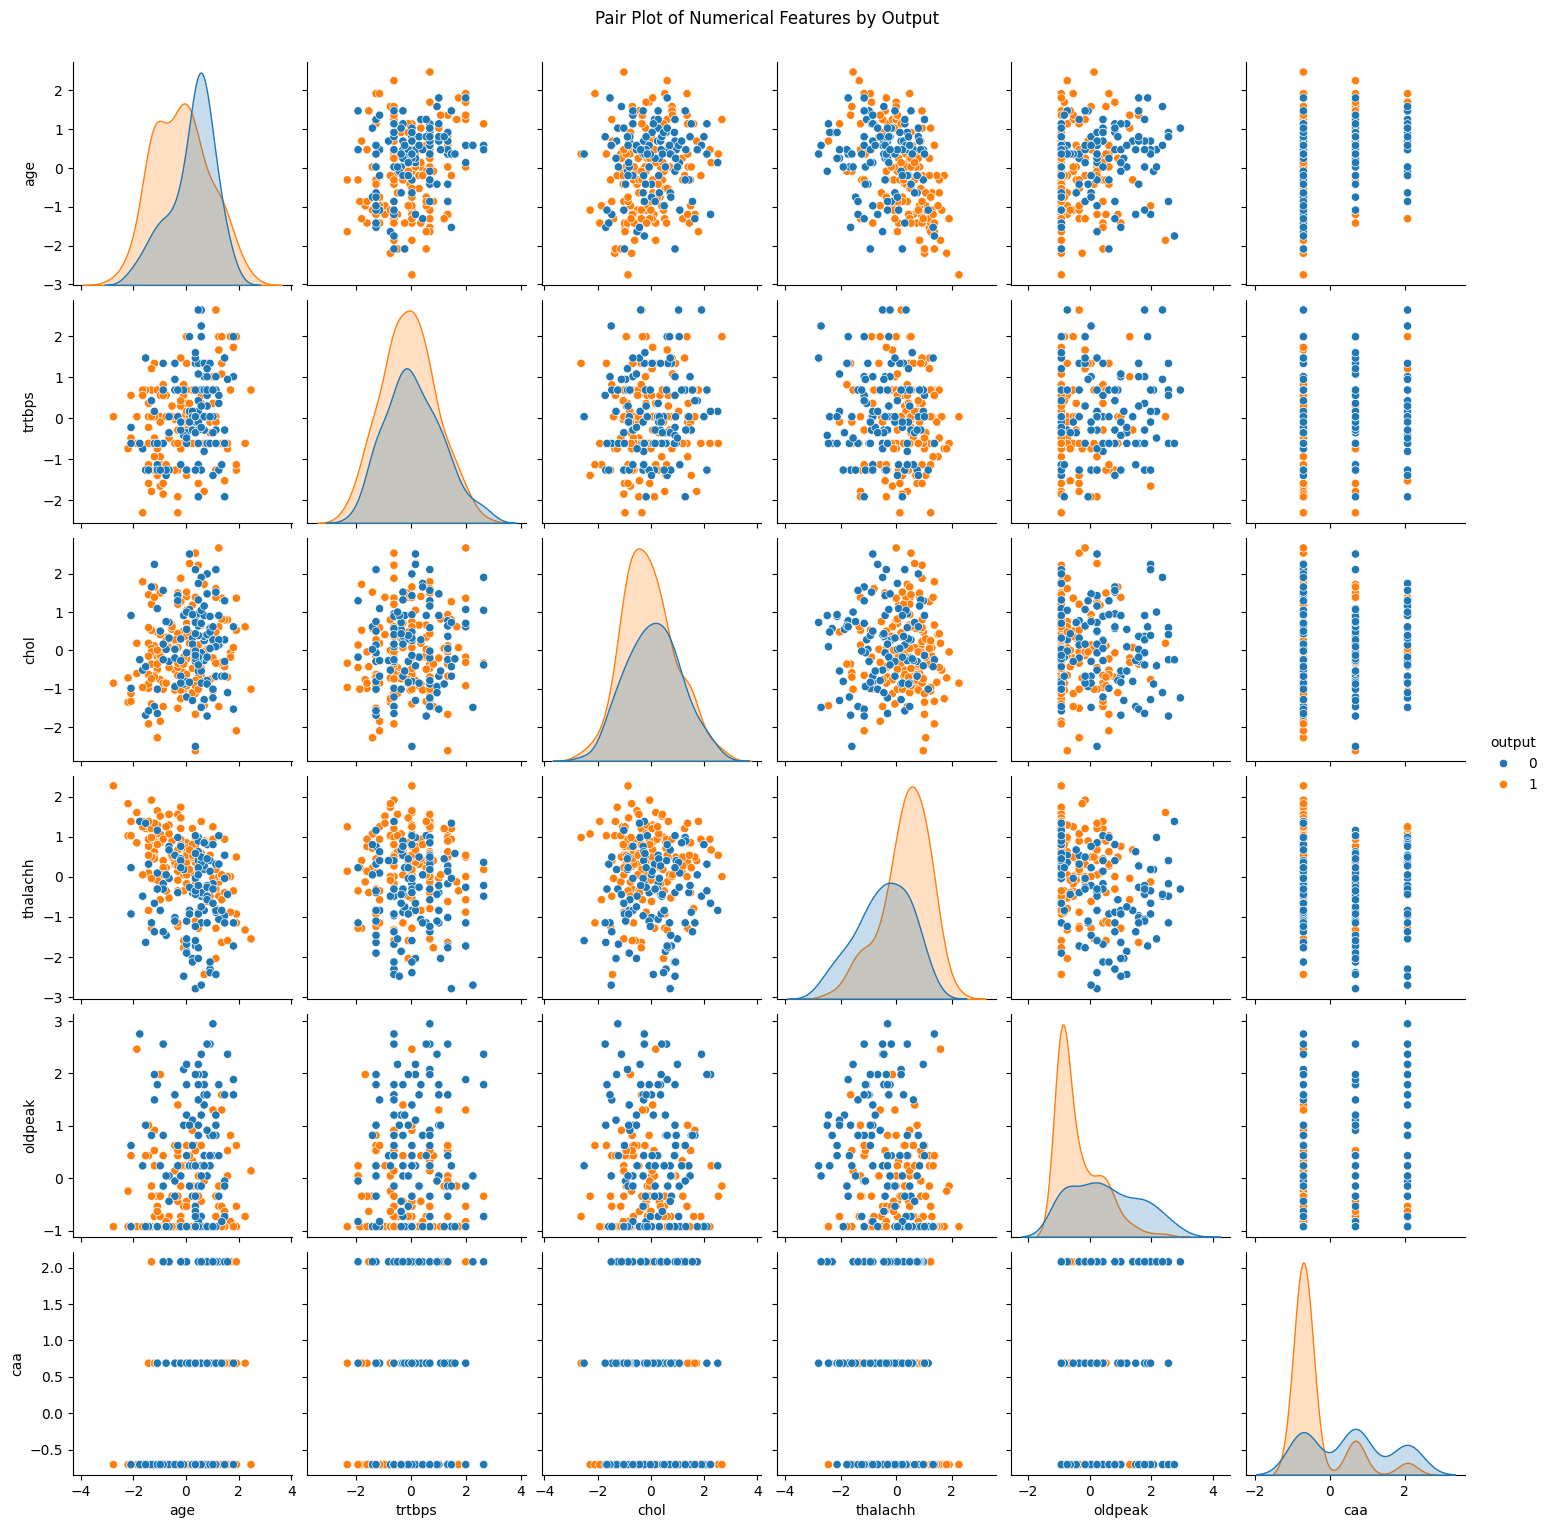

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histograms for numerical columns
numerical_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'caa']
df[numerical_cols].hist(figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

# 2. Box plots for numerical columns, grouped by 'output'
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x='output', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col} by Output')
plt.tight_layout()
plt.show()

# 3. Count plots for categorical columns
# Re-identify categorical columns from the current dataframe
categorical_cols = df.select_dtypes(include=['int64', 'object']).columns.tolist()
# Remove numerical and output columns from the list of categorical columns
categorical_cols = [col for col in categorical_cols if col not in numerical_cols + ['output']]


fig, axes = plt.subplots(nrows=(len(categorical_cols) + 1) // 2, ncols=2, figsize=(15, 5 * ((len(categorical_cols) + 1) // 2)))
axes = axes.flatten()
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')
if len(categorical_cols) < len(axes):
    for j in range(len(categorical_cols), len(axes)):
        fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

# 4. Correlation heatmap for numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# 5. Scatter plots for pairs of numerical variables, colored by 'output'
sns.pairplot(df[numerical_cols + ['output']], hue='output', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features by Output', y=1.02)
plt.show()

## Build model

### Subtask:
Select and build a predictive model for heart disease using appropriate algorithms.


**Reasoning**:
Separate features and target, split data into training and testing sets, import and train a classification model.



In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 1. Separate features (X) and target variable (y)
X = df.drop('output', axis=1)
y = df['output']

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Import and 4. Instantiate a classification model (Logistic Regression)
model = LogisticRegression(max_iter=200) # Increased max_iter for convergence

# 5. Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

## Evaluate model

### Subtask:
Evaluate the performance of the built model using relevant metrics and visualize the results.


**Reasoning**:
Import necessary metrics, make predictions, calculate evaluation metrics, print them, compute the confusion matrix, and visualize it.



Accuracy: 0.9245
Precision: 0.9394
Recall: 0.9394
F1-score: 0.9394


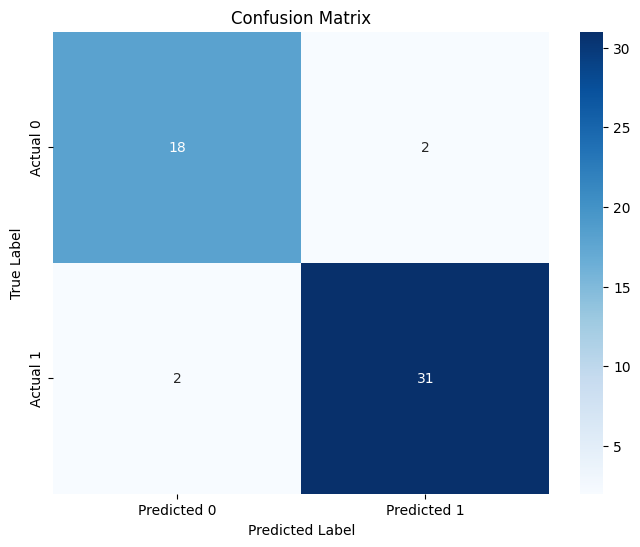

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Use the trained model (model) to make predictions on the test set (X_test).
y_pred = model.predict(X_test)

# 3. Calculate the accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 4. Print the calculated evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# 5. Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 6. Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Predict and visualize

### Subtask:
Make predictions using the trained model and visualize the predictions and model performance metrics.


**Reasoning**:
Use the trained model to make predictions on the training and test data, then visualize the true vs predicted labels and the evaluation metrics.



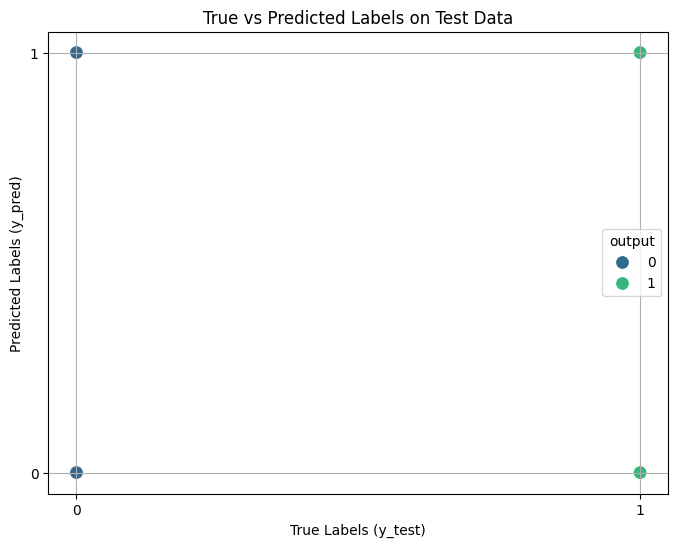

/tmp/ipython-input-1878765850.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


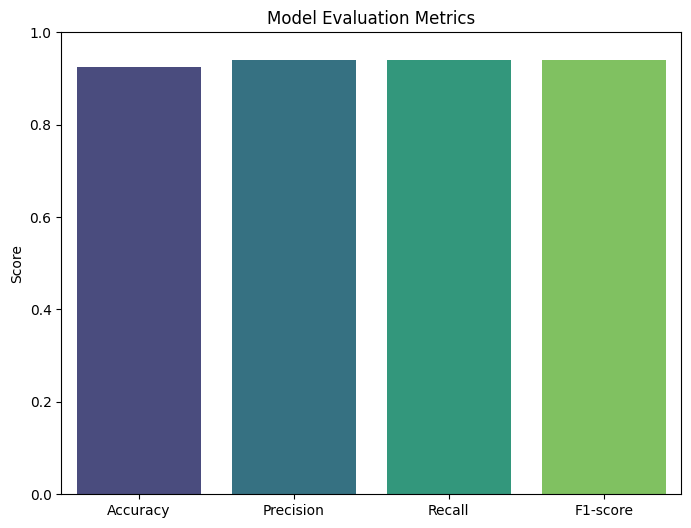

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Use the trained model to predict the target variable on the training data (X_train).
y_train_pred = model.predict(X_train)

# 2. Use the trained model to predict the target variable on the test data (X_test).
# These predictions are already stored in the y_pred variable from the previous step.

# 3. Create a scatter plot to visualize the true labels (y_test) against the predicted labels (y_pred).
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, hue=y_test, palette='viridis', s=100)
plt.title('True vs Predicted Labels on Test Data')
plt.xlabel('True Labels (y_test)')
plt.ylabel('Predicted Labels (y_pred)')
plt.yticks([0, 1])
plt.xticks([0, 1])
plt.grid(True)
plt.show()

# 6. Create a bar plot to visualize the calculated evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains 303 rows and 14 columns.
*   There were no missing values in the dataset.
*   Outliers were identified and removed from several numerical columns: 'trtbps', 'chol', 'thalachh', 'oldpeak', and 'caa'. A total of 40 rows were removed, resulting in a dataset shape of (263, 14).
*   Numerical features were scaled using `StandardScaler`.
*   Exploratory Data Analysis revealed insights into the distribution of numerical and categorical features and their relationship with the target variable 'output' (presence of heart disease).
*   A Logistic Regression model was trained to predict heart disease.
*   The trained model achieved an accuracy of 0.9245 on the test set.
*   The precision, recall, and F1-score for the positive class (heart disease) were all approximately 0.9394.
*   The confusion matrix provided a detailed breakdown of the model's true positives, true negatives, false positives, and false negatives.

### Insights or Next Steps

*   The Logistic Regression model shows promising performance for predicting heart disease based on the given dataset. Further analysis could involve exploring other classification algorithms (e.g., Support Vector Machines, Random Forests, Gradient Boosting) to see if higher performance can be achieved.
*   Investigate the features that the Logistic Regression model found most important for prediction. This could involve looking at the model's coefficients or using feature importance techniques for tree-based models. This information could be valuable for medical professionals in understanding key risk factors.
